In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv ('../data/insurance_data.csv')
print(df.columns)
df.head()

Index(['Unnamed: 0', 'Province', 'Zipcode', 'Gender', 'Total_Claim',
       'Premium'],
      dtype='object')


,Unnamed: 0,Province,Zipcode,Gender,Total_Claim,Premium
0,0,C,1003,Female,652.740226,898.493109
1,1,A,1003,Female,1159.389368,1040.563548
2,2,C,1003,Male,729.641413,1137.593249
3,3,C,1003,Female,253.524198,764.332164
4,4,A,1001,Male,938.056933,1349.828367


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Province     1000 non-null   object 
 2   Zipcode      1000 non-null   int64  
 3   Gender       1000 non-null   object 
 4   Total_Claim  1000 non-null   float64
 5   Premium      1000 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 47.0+ KB
None
        Unnamed: 0      Zipcode  Total_Claim      Premium
count  1000.000000  1000.000000  1000.000000  1000.000000
mean    499.500000  1001.999000   931.049722  1112.742919
std     288.819436     0.817109   566.679835   198.269534
min       0.000000  1001.000000    27.339840   527.702050
25%     249.750000  1001.000000   513.545195   984.410128
50%     499.500000  1002.000000   816.332296  1115.189886
75%     749.250000  1003.000000  1225.736472  1252.291547
max     999.000000  1003.00

In [6]:
print(df.dtypes)


Unnamed: 0       int64
Province        object
Zipcode          int64
Gender          object
Total_Claim    float64
Premium        float64
dtype: object


In [7]:
print(df.isnull().sum())


Unnamed: 0     0
Province       0
Zipcode        0
Gender         0
Total_Claim    0
Premium        0
dtype: int64


In [17]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.histplot(df['Total_Claim'], kde=True)
# plt.show()

# sns.countplot(df['Gender'])
# plt.show()


c:\Users\HP\Desktop\10 academy\KAIM-W3-AlphaCare-Insurance-Solutions\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data loaded successfully.


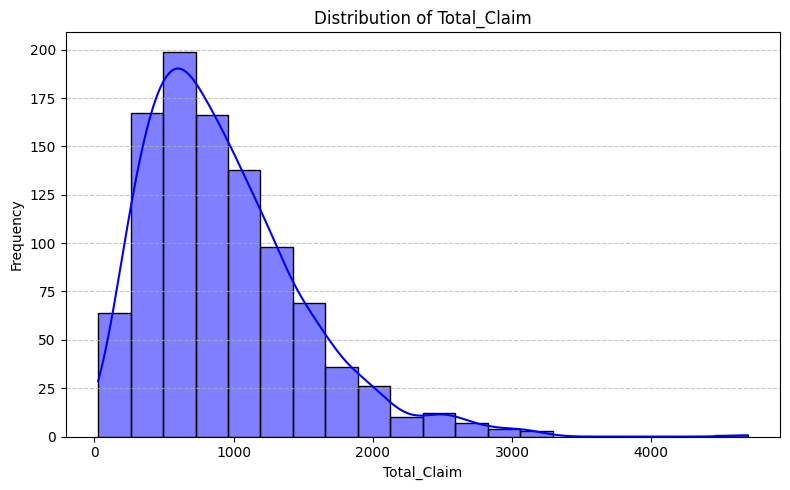

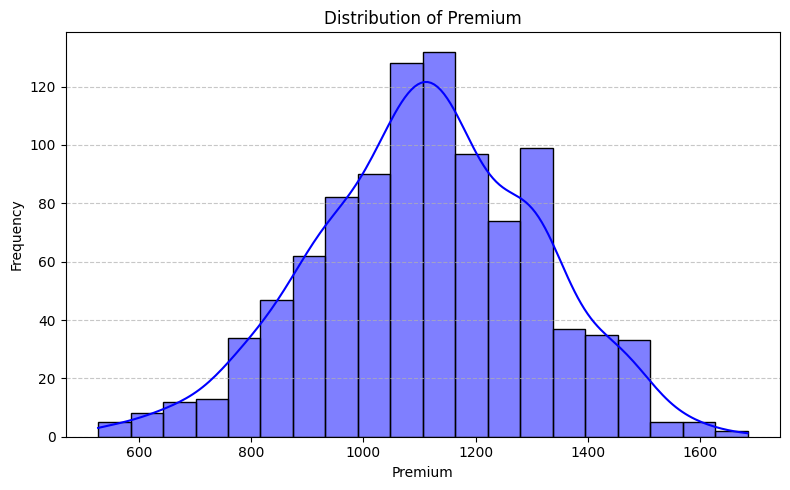

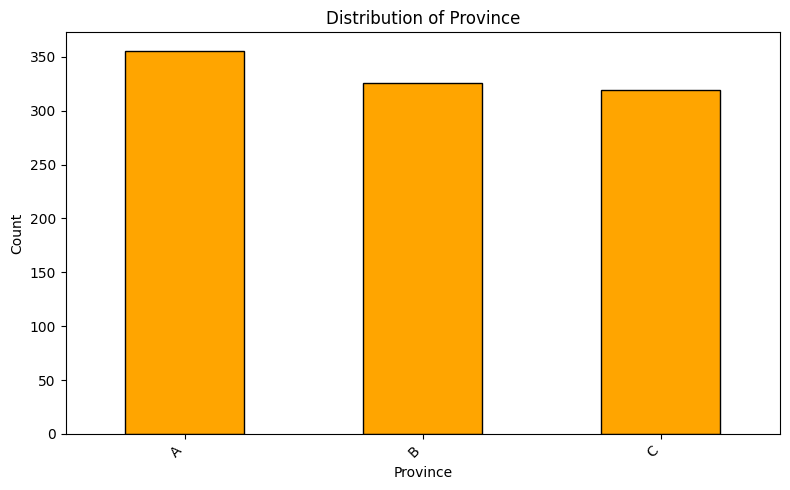

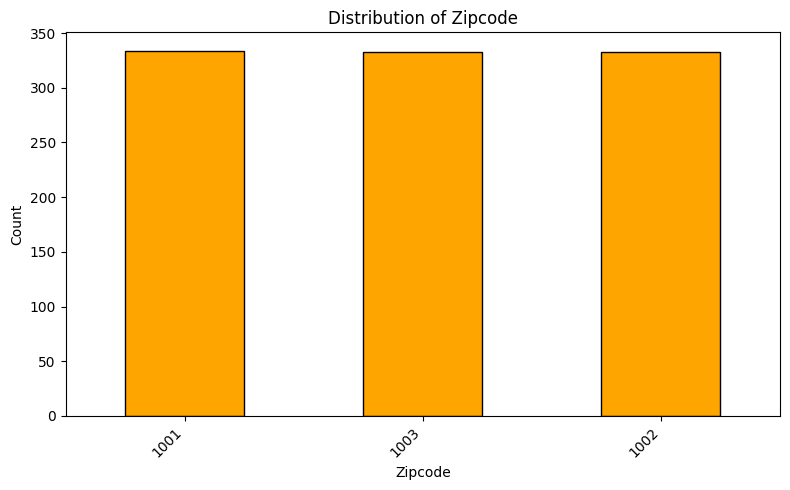

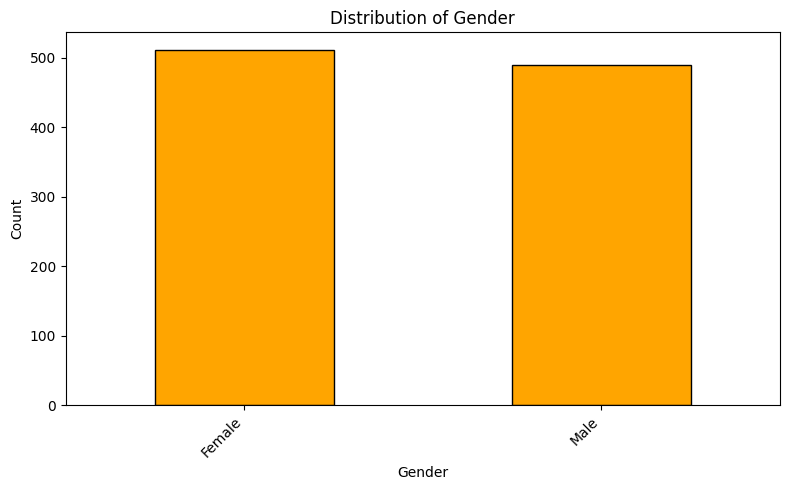

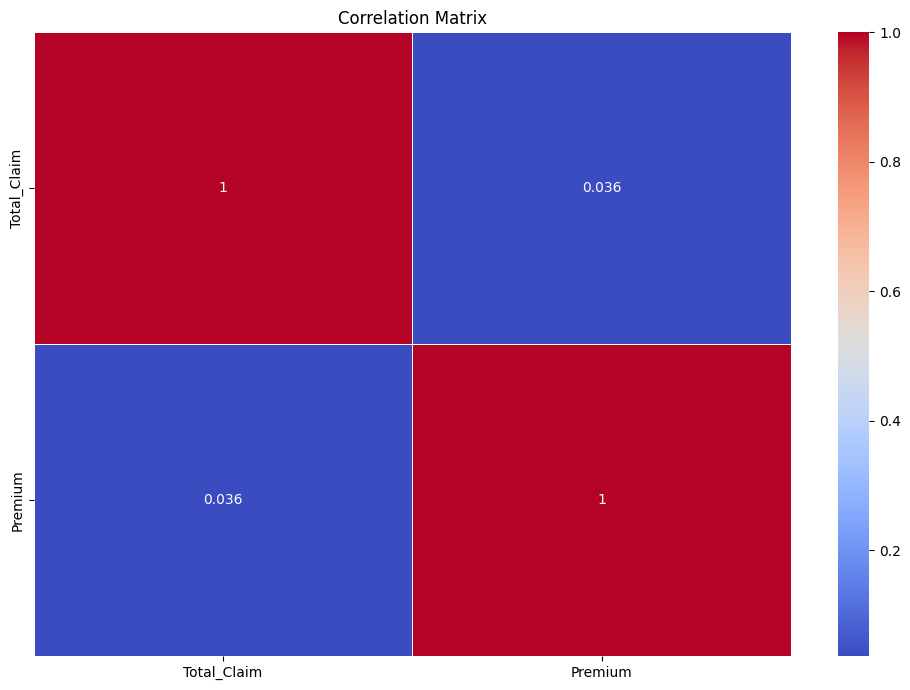

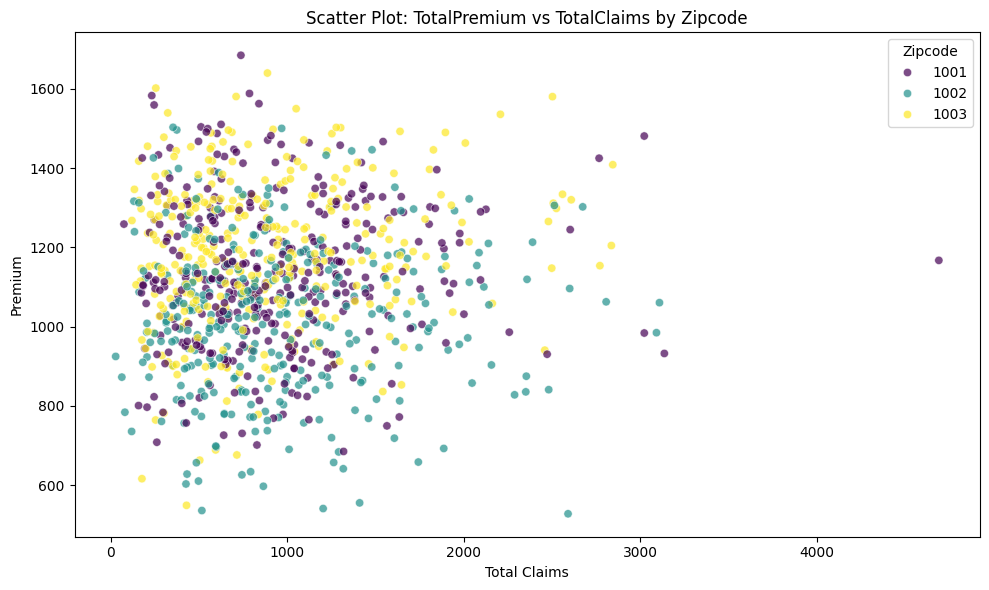

c:\Users\HP\Desktop\10 academy\KAIM-W3-AlphaCare-Insurance-Solutions\notebooks\../scripts\alphacare_insurance_analysis.py:168: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Province', y='Premium', data=data, palette='Set2')


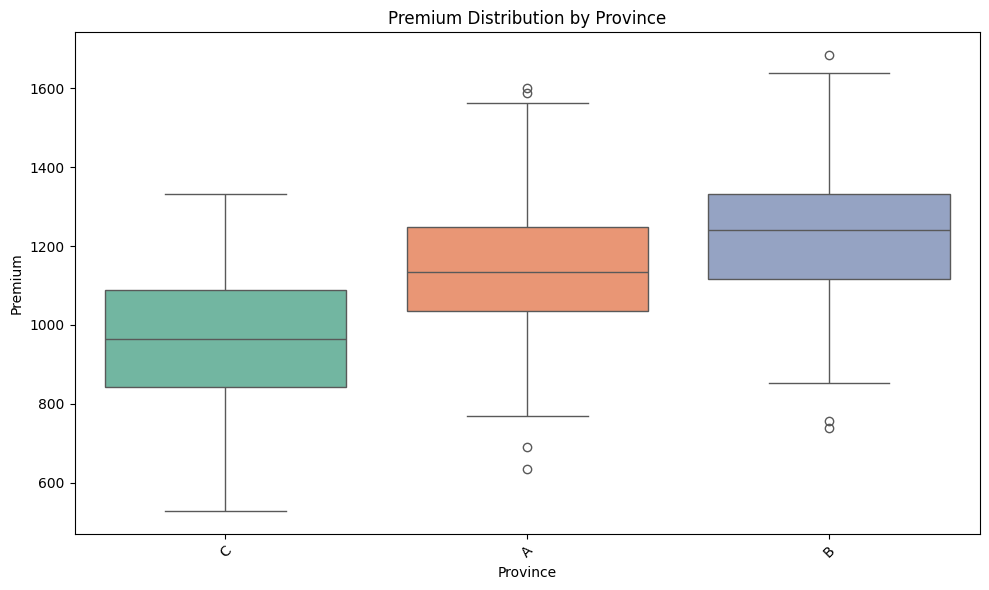

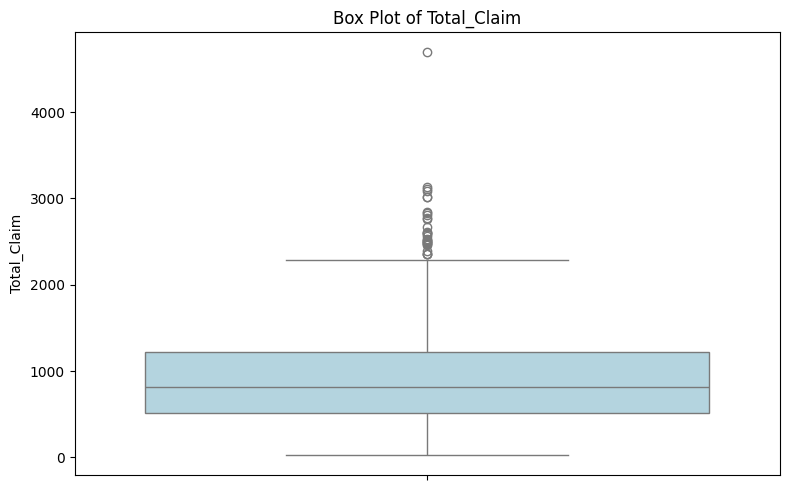

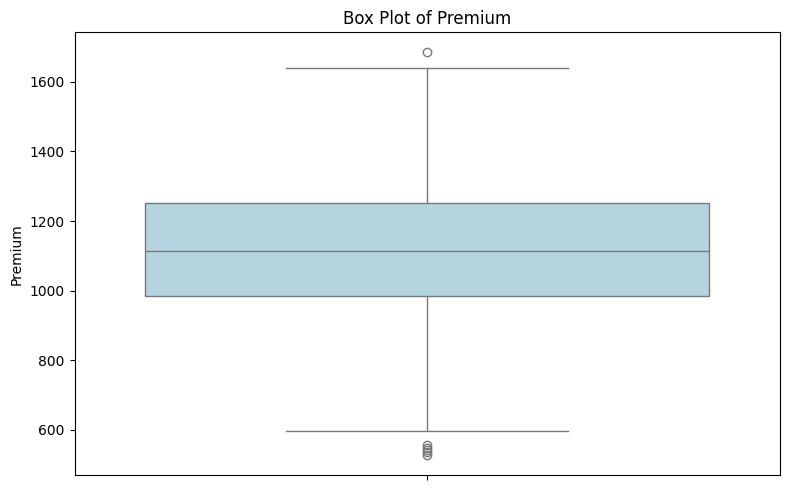

A/B Hypothesis Testing Results:
Group A Mean: 941.6866221884275
Group B Mean: 964.328426645349
T-statistic: -0.5119223125311688
P-value: 0.6088753371119786
Reject Null Hypothesis: False
Missing data handled using strategy: mean
Categorical data encoded.
Data split into 70% training and 30% testing sets.
Linear Regression model trained.
Random Forest model trained.
XGBoost model trained.
Model evaluation complete. Mean Squared Error: 21089.8702
Model evaluation complete. Mean Squared Error: 24801.6723
Model evaluation complete. Mean Squared Error: 30045.5516
Model does not support feature importance analysis.
Feature importance analysis complete.
Feature importance analysis complete.


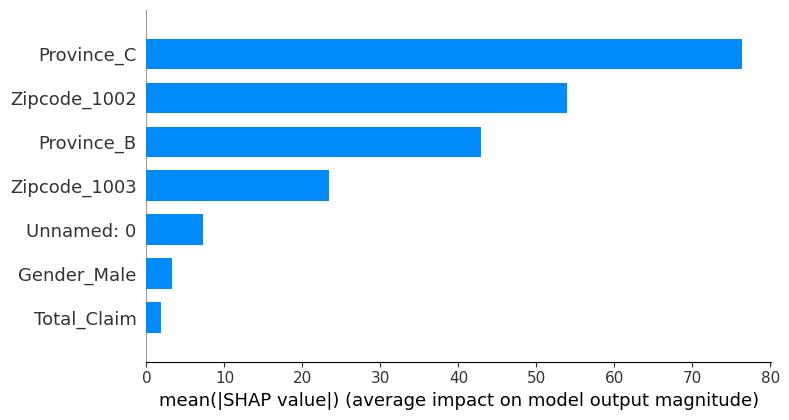

Model interpretability complete using SHAP.


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import shap


# Add the path to the folder containing alphacare_insurance_analysis.py
sys.path.append('../scripts')  # Adjust this path based on the actual location

# Import the functions from the script
# from alphacare_insurance_analysis import load_data, plot_correlation_matrix, plot_scatter_by_zipcode, plot_trends_over_geography, plot_boxplot_for_outliers, create_directory, plot_numerical_distributions, plot_categorical_distributions
from alphacare_insurance_analysis import load_data, ab_hypothesis_testing,plot_correlation_matrix, plot_scatter_by_zipcode, plot_trends_over_geography, plot_boxplot_for_outliers, create_directory, plot_numerical_distributions,encode_categorical_data, evaluate_model, feature_importance_analysis, handle_missing_data, interpret_model_predictions, split_data, train_linear_regression, train_random_forest, train_xgboost, plot_categorical_distributions

# Set paths
data_path = '../data/insurance_data.csv'  # Adjust the path to your dataset
plots_dir = '../plots'  # Directory where plots will be saved

# Step 1: Load the data
data = load_data(data_path)

# Step 2: Create the plots directory if it doesn't exist
create_directory(plots_dir)

# Step 3: Perform Univariate Analysis
if data is not None:
    # Plot numerical distributions
    numerical_columns = ['Total_Claim', 'Premium']
    plot_numerical_distributions(data, numerical_columns, plots_dir)
    
    # Plot categorical distributions
    categorical_columns = ['Province', 'Zipcode', 'Gender']
    plot_categorical_distributions(data, categorical_columns, plots_dir)

    # Perform Bivariate/Multivariate Analysis
    # 1. Correlation Matrix for numerical columns
    numerical_columns_for_correlation = ['Total_Claim', 'Premium']  # Adjusted columns
    plot_correlation_matrix(data, numerical_columns_for_correlation, plots_dir)

    # 2. Scatter plot of TotalPremium vs TotalClaims by Zipcode
    plot_scatter_by_zipcode(data, plots_dir)

    # 3. Box plot for trends over geography
    plot_trends_over_geography(data, plots_dir)

    # 4. Box plot for outlier detection in numerical columns
    plot_boxplot_for_outliers(data, numerical_columns, plots_dir)
    
     # Perform A/B Hypothesis Testing
    # Check the number of samples in each group before performing the test
    result = ab_hypothesis_testing(data, 'Zipcode', 'Total_Claim')

    # Check if an error is returned
    if 'Error' in result:
        print(result['Error'])
    else:
        # Print results from the dictionary
        print("A/B Hypothesis Testing Results:")
        print(f"Group A Mean: {result['Group A Mean']}")
        print(f"Group B Mean: {result['Group B Mean']}")
        print(f"T-statistic: {result['T-statistic']}")
        print(f"P-value: {result['P-value']}")
        print(f"Reject Null Hypothesis: {result['Reject Null Hypothesis']}")

# Handle missing data
data = handle_missing_data(data)

# Encode categorical data
categorical_columns = ["Province", "Zipcode", "Gender"]  # Example columns to encode
data = encode_categorical_data(data, categorical_columns)

# Split the data
target_column = "Premium"  # Example target column
X_train, X_test, y_train, y_test = split_data(data, target_column)

# Train and evaluate models
lr_model = train_linear_regression(X_train, y_train)
rf_model = train_random_forest(X_train, y_train)
xgb_model = train_xgboost(X_train, y_train)

# Evaluate models
lr_mse = evaluate_model(lr_model, X_test, y_test)
rf_mse = evaluate_model(rf_model, X_test, y_test)
xgb_mse = evaluate_model(xgb_model, X_test, y_test)

# Feature importance analysis
lr_feature_importance = feature_importance_analysis(lr_model, X_train)
rf_feature_importance = feature_importance_analysis(rf_model, X_train)
xgb_feature_importance = feature_importance_analysis(xgb_model, X_train)

# Model interpretability with SHAP
lr_shap_values = interpret_model_predictions(lr_model, X_train)
rf_shap_values = interpret_model_predictions(rf_model, X_train)
xgb_shap_values = interpret_model_predictions(xgb_model, X_train)
